# automatic differentiation

Automatic differentiation: techniques for numerically evaluating the derivatives of **functions** w.r.t multiple inputs simultaneously.

## computation graph

computation graph: 

- a directed acyclic graph (DAG) that represents the sequence of operations (+-*/) and dependencies between variables in a function. 
    
- simplify complex expressions to apply automatic differentiation easier.

node properties

- children nodes

- value: computed by forward pass given input $\mathbf{x}$

    $$
    \text{value}=\text{forward}(\mathbf{x})
    $$

- gradient: computed by backward pass given error at this node $ \delta^T=\frac{\partial L}{\partial \text{value}}$

    $$
    \text{gradient}=\text{backward}(\delta) = \delta^T\frac{\partial \text{value}}{\partial \mathbf{x}}
    $$


<img src='https://pytorch.org/assets/images/augmented_computational_graph.png' />


# backpropagation

Backpropagation: an algorithm for training **feedforward NN**.

a specific application of automatic differentiation to compute gradient of **loss function** w.r.t each weight and bias for a single training example by applying the multi-variable chain rule.

$$
\frac{\partial C}{\partial W}, \frac{\partial C}{\partial b}
$$

understanding of backpropagation can help use **design activation functions** such that its derivative is always positive and never close to 0, e.g., ReLU

- e.g., sigmoid function is not a good activation

    weights will update slowly if input neuron is low activation or output neuron has saturated (i.e., low or high activation)

    consider the error of output layer, when output neuron is **saturated** ($z$ is infinitely small or large  -> $\sigma \approx 0$ or 1, $\sigma$ becomes very flat)

    $\Rightarrow \sigma' (z_j^L) \approx 0 \Rightarrow \delta_j ^L \approx 0 \Rightarrow $ weight in final layer will update slowly

$$
\delta_j ^L = \frac{\partial C}{\partial a_j^L} \sigma' (z_j^L)
$$
 



## why backpropagation?

- backpropagation is much faster than direct approximation

- backpropagation: compute all gradients using one forward and one backward pass

- approximation: million passes bc million weights, for each weight $W_{ij}$, compute

$$
\frac{\partial C}{\partial W_{ij}} = \frac{C(W_{ij}+\epsilon e_{ij})-C(W_{ij})}{\epsilon }
$$

## full backpropagation algorithm

input:

- computation graph with root node

- values for variable nodes

- values for layer parameters

forward pass

- start at root node

- for each current node

    - if it is a variable node: 
    
        set node's value to be the value designated for this variable

    - if it is an operation node:

        recursively call forward pass on node's children

        set node's value to be output of forward function applied to values of nodes' children

backward pass

- start at root node

- for each current node

    if it's root node:

        set graident to be 1

    if it's variable node:

        terminate

        set gradient of node's children to outputs of backward functions applied to node's gradient

        recursively call backward pass on node's children

# forward propagation

- forward propagation is how NN propagates signals to compute outputs

    matrix computation is fast

- matrix notation of activation computation provides a global view of layer-layer relationship

    Apply weight matrix to activations, add bias vector, then apply activation function

$$
\mathbf{z}^l = W^l \mathbf{a}^{l-1} + \mathbf{b}^l
\\[1em]
\mathbf{a}^l = \sigma(\mathbf{z}^l)
$$

- vector notation of activation computation provides a local view of neuron-neuron relationship

activation $a_j^l$ of jth neuron on the lth layer is related to the activations in the $l-1$ th layer

$$
a_j^l = \sigma (\sum _k w_{jk}^l a_k^{l-1} + b_j^l )
$$

where $\sigma$ is a non-linear activation function

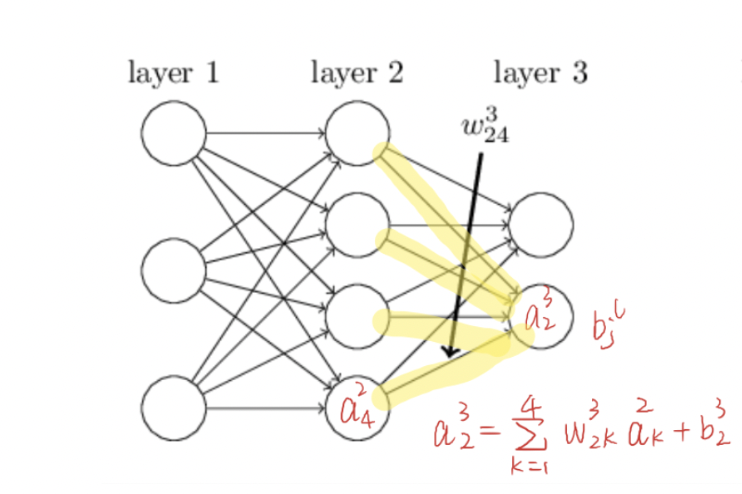

## error forward

- suppose you made a small change $\Delta w_{jk}^l$ to a weight $w_{jk}^l$ (the kth weight for the jth neuron in the $l$-th layer)

    $\Rightarrow$ cause a change $\Delta a_{j}^l$ in the activation of the output neuron $a_{j}^l$
    
    $$
    \Delta a_{j}^l \approx \frac{\partial a_{j}^l}{\partial w_{jk}^l} \Delta w_{jk}^l
    $$
    
    $\Rightarrow$ cause a change $\Delta a_{q}^{l+1}\  (q = 1, 2, ...)$ in all the activations of neurons in the next layer $a_q^{l+1}\  (q = 1, 2, ...)$
    
    $$
    \Delta a_{q}^{l+1} \approx \frac{\partial a_{q}^{l+1}}{\partial a_{j}^l} \color{red}{\Delta a_{j}^l} \approx \frac{\partial a_{q}^{l+1}}{\partial a_{j}^l} \left(\frac{\partial a_{j}^l}{\partial w_{jk}^l} \Delta w_{jk}^l \right)
    $$
    
    $\Rightarrow$ cause a change of activation in specific neurons from layer $l+1$ to output layer.. $a_j^l, a_{q}^{l+1},..., a_{n}^{L-1}, a_m^L$
    
    $\Rightarrow$ cause a change $\Delta y$ to the output
    
    $\Rightarrow$ cause a change $\Delta C$ to the cost function
    
    $$
    \Delta C \approx \frac{\partial C}{\partial w_{jk}^l} \Delta w_{jk}^l
    $$

- if we track how a weight change $\Delta w_{jk}^l$ propagates to a change in the cost function $\Delta C$,
    
    then we can compute gradient of cost function w.r.t the weight by
    
    $$
    \frac{\partial C}{\partial w_{jk}^l} \approx  \frac{\Delta C} {\Delta w_{jk}^l}
    $$


$$
\Delta C \approx \frac{\partial C}{\partial a_m^L} \frac{\partial a_m^L}{\partial a_n^{L-1}}\frac{\partial a_n^{L-1}}{\partial a_p^{L-2}}\cdots \frac{\partial a_q^{l+1}}{\partial a_j^l}\frac{\partial a_j^l}{\partial w_{jk}^l} \Delta w_{jk}^l
$$

 
$\Rightarrow$

$$
\frac{\partial C}{\partial w_{jk}^l} \approx  \frac{\Delta C} {\Delta w_{jk}^l} \approx  \frac{\partial C}{\partial a_m^L} \frac{\partial a_m^L}{\partial a_n^{L-1}}\frac{\partial a_n^{L-1}}{\partial a_p^{L-2}}\cdots \frac{\partial a_q^{l+1}}{\partial a_j^l}\frac{\partial a_j^l}{\partial w_{jk}^l}
$$

$\Rightarrow$ summing over all paths

$$
\frac{\partial C}{\partial w_{jk}^l} \approx  \sum_{m,n,p...q}  \frac{\partial C}{\partial a_m^L} \frac{\partial a_m^L}{\partial a_n^{L-1}}\frac{\partial a_n^{L-1}}{\partial a_p^{L-2}}\cdots \frac{\partial a_q^{l+1}}{\partial a_j^l}\frac{\partial a_j^l}{\partial w_{jk}^l}
$$

## error at the node

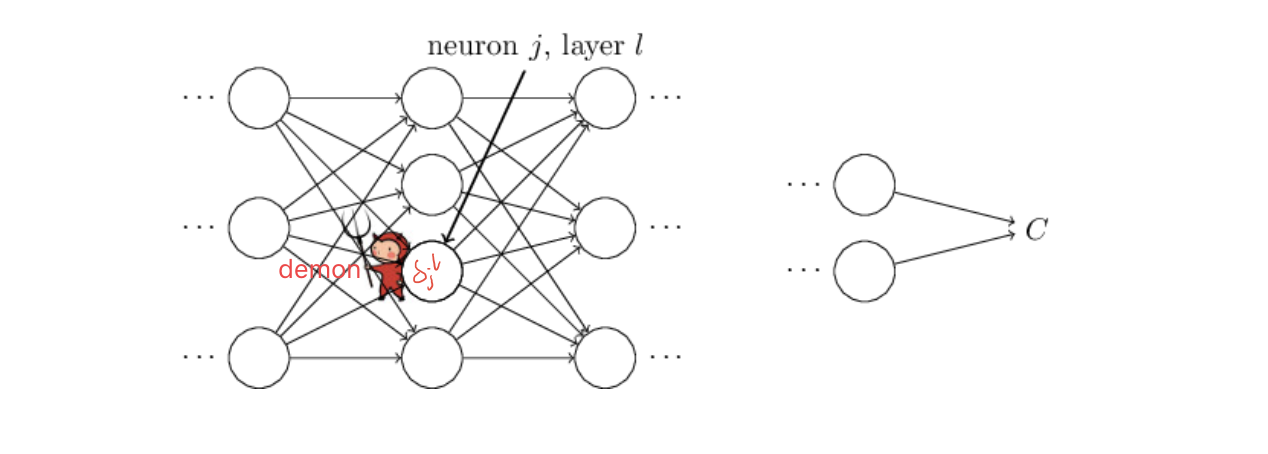

- the error in $z_j^l$ (the jth neuron and the $l$-th layer before nonlinear activation) is an intermediate quantity $\delta _j^l$

    backpropagation enables us to compute $\delta _j^l$ which we will relate to $\frac{\partial C}{\partial w_{jk}^l}$ and $\frac{\partial C}{\partial b_{j}^l}$ in one step

- change $\delta _j^l \Rightarrow$ cost changes $\Delta C=\delta _j^l \Delta z_j^l$


- case 1: $\delta _j^l$ is large (either positive or negative)

    demon can lower cost a lot by choosing $\Delta z_j^l$ with opposite sign of $\delta _j^l$
    

- case 2: $\delta _j^l \rightarrow 0$ is small 

    can't decrease cost much by perturbing $z_j^l$

## 4 fundamental equation of backpropagation

1. error at output layer $L$

$$
\delta ^L = \nabla_a C \odot \sigma' (z^L)
$$


2. error at $l$-th layer

$$
\delta ^l = \left( (w^{l+1})^T \delta ^{l+1}\right)\odot \sigma' (z^L)
$$


3. error at bias of jth node of $l$ th layer

$$
\frac{\partial C}{\partial b_{j}^l}=\delta_j ^l
$$

4. error at weight of kth node of $l-1$ th layer to jth node of $l$ th layer

$$
\frac{\partial C}{\partial w_{jk}^l}=a_k^{l-1}\delta_j ^l
$$

### Proof

#### error at output layer L

- by definition

$$
\delta ^L = \frac{\partial C}{\partial z^L} = \begin{bmatrix}
\frac{\partial C}{\partial z_1^L} \\
\frac{\partial C}{\partial z_2^L} \\
\vdots \\ 
\frac{\partial C}{\partial z_j^L}
\end{bmatrix} = \begin{bmatrix}
\delta_1 ^L \\
\delta_2 ^L \\
\vdots \\ 
\delta_j ^L
\end{bmatrix}
$$

- error of jth node of output layer: $\delta_j ^L$

$$
\delta_j ^L = \frac{\partial C}{\partial z_j^L}
$$

- use multivariate chain rule:

$$
\delta_j ^L = \frac{\partial C}{\partial a_j^L}  \frac{\partial a_j^L}{\partial z_j^L}  = \frac{\partial C}{\partial a_j^L} \sigma' (z_j^L)
$$

where $a_j^L = \sigma(z_j^L)$ is activation of $z_j^L$

#### error at  l-th layer

- error at jth node of $l$ th layer: $\delta_j^l$

$$
\delta_j^l = \sum _k \frac{\partial z_k^{l+1}}{\partial z_j^l} \delta_k ^{l+1} = \sum _k \frac{\partial w_{kj}^{l+1} \sigma(z_j)^l+ b_j^{l+1}}{\partial z_j^l} \delta_k ^{l+1} 
$$

$$
= \sum _k w_{kj}^{l+1}\sigma'(z_j)^l \delta_k ^{l+1} = \sum _k w_{kj}^{l+1} \delta_k ^{l+1}  \sigma'(z_j)^l
$$

#### error at bias

- error at bias of jth node of  lth layer

    use multivariate chain rule

$$
\frac{\partial C}{\partial b_{j}^l}=\frac{\partial C}{\partial z_{j}^l}\frac{\partial z_{j}^l}{\partial b_{j}^l} = \frac{\partial C}{\partial z_{j}^l}\frac{\partial \sum_k (w_{jk}^l a_j^{l-1} +b_j^l)}{\partial b_{j}^l} = \frac{\partial C}{\partial z_{j}^l}\cdot 1 = \delta_j^l
$$

#### error at weight

- error at weight of kth node of $l-1$ th layer to jth node of $l$ th layer

    use multivariate chain rule

$$
\frac{\partial C}{\partial w_{jk}^l}=\frac{\partial C}{\partial z_{j}^l}\frac{\partial z_{j}^l}{\delta w_{jk}^l}=\frac{\partial C}{\partial z_{j}^l}\frac{\partial (w_{jk}^l a_k^{l-1} +b_k^l)}{\partial w_{jk}^l} =\frac{\partial C}{\partial z_{j}^l}a_k^{l-1}=a_k^{l-1}\delta_j ^l
$$

# backpropagation with SGD

1. input a set of training examples


2. for each training example $x$: set the input activation $a^{1}$ (1 means the first layer) and do the following:

- feedforward: for each $l=2, 3,...,L$, compute

$$
z^{l} = w^l a^{ l-1} + b^l
$$

$$
a^{l} = \sigma (z^{l})
$$
    
    
- compute output error
$$
\delta ^{L} =\nabla_a C \odot \sigma' (z^{l})
$$

    
- backpropagate the error: for each $l=L-1, L-2, ..., 2$, 

    compute error at nodes of $l$ th layer

$$
\delta ^{l} = \left( (w^{l+1})^T \delta ^{ l+1}\right)\odot \sigma' (z^{l})
$$


- compute gradient of cost function w.r.t any weights and biases

$$
\frac{\partial C}{\partial w^{l}}= \delta^{l}(a^{l-1})^T
\\[1em]
\frac{\partial C}{\partial b^{l}}=\delta^{l}
$$


3. gradient descent: for each $l=L, L-1, L-2, ..., 2$

    move weight or bias in the opposite direction of gradient by a factor of learning rate $\eta$


- update the weights
    
$$
w^{l+1}\leftarrow w^l - \frac{\eta}{m} \sum_x \frac{\partial C}{\partial w^{l}}= w^l - \frac{\eta}{m} \sum_x \delta^{l}(a^{l-1})^T
$$   

- update the biases

$$
b^{l+1} \leftarrow b^l - \frac{\eta}{m} \sum_x \frac{\partial C}{\partial b^{l}}= b^l - \frac{\eta}{m} \sum_x \delta^{l}
$$  

# learning Algorithm don't need backpropagation

- Genetic Algorithm (GA): An evolutionary optimization method that searches for the optimal set of weights by mimicking natural selection, mutation, and crossover.

- Neural Tangent Kernel (NTK): A kernel-based approach that leverages properties of infinitely wide NN without requiring weight updates.

- Neural ODEs: treats NN as continuous-time dynamical systems and uses ordinary differential equation (ODE) solvers to update the weights.

- Energy-based Models: network is trained to minimize an energy function that represents the discrepancy between predicted output and target output. Training can be performed by contrastive divergence.